[[[1, 1, 0, 1], [0, 1, 1, 0], [1, 1, 0, 1], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 1, 0], [1, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 1, 0], [1, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 0], [0, 1, 1, 0], [1, 1, 0, 0], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 1, 0], [1, 1, 0, 1], [0, 1, 1, 0], [1, 1, 0, 0], [0, 1, 0, 0], [0, 1, 1, 1], [1, 1, 0, 0], [0, 1, 0, 0], [0, 1, 1, 0], [1, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 0], [0, 1, 1, 0], [1, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0]], [[1, 1, 0, 0], [0, 0, 1, 1], [1, 1, 0, 0], [0, 0, 1, 1], [1, 1, 1, 0], [1, 1, 0, 0], [0, 0, 1, 1], [1, 0, 1, 1], [1, 0, 0, 1], [0, 1, 0, 0], [0, 1, 1, 0], [1, 0, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 1], [0, 0, 1, 1], [1

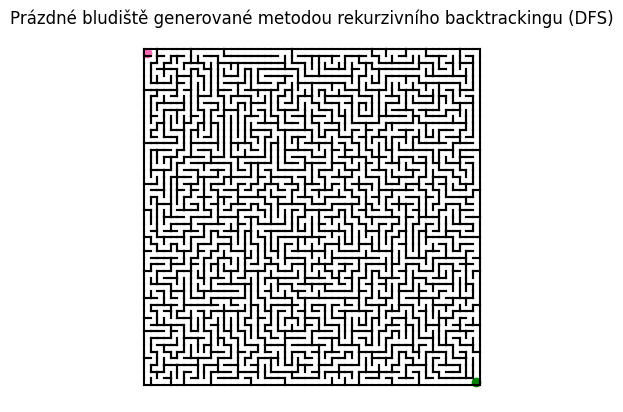

In [1]:

import random
import matplotlib.pyplot as plt

def generate_maze_recursive_backtracking(aX_size, aY_size):
    aWalls = [[[1,1,1,1] for _ in range(aX_size)] for _ in range(aY_size)]
    aVisited_nodes = [[False for _ in range(aX_size)] for _ in range(aY_size)]
    path = [(0,0)]
    aVisited_nodes[0][0] = True

    while path:
        x, y = path[-1]
        possible_directions = []
        if x > 0 and not aVisited_nodes[y][x-1]:
            possible_directions.append((-1, 0, 0, 2))
        if x < aX_size-1 and not aVisited_nodes[y][x+1]:
            possible_directions.append((1, 0, 2, 0))
        if y > 0 and not aVisited_nodes[y-1][x]:
            possible_directions.append((0, -1, 1, 3))   
        if y < aY_size-1 and not aVisited_nodes[y+1][x]:
            possible_directions.append((0, 1, 3, 1))    

        if possible_directions:
            dx, dy, w1, w2 = random.choice(possible_directions)
            nx, ny = x+dx, y+dy
            aWalls[y][x][w1] = 0
            aWalls[ny][nx][w2] = 0
            aVisited_nodes[ny][nx] = True
            path.append((nx, ny))
        else:
            path.pop()
    return aWalls


def draw_maze(aWalls):
    fig, ax = plt.subplots() 
    aY_size = len(aWalls[0])
    aX_size = len(aWalls)
    for y in range(aY_size):
        for x in range(aX_size):
            left, top, right, bottom = aWalls[y][x]
            x0, x1 = x, x+1
            y0, y1 = aY_size - y, aY_size - (y+1)

            if top: ax.plot([x0, x1], [y0, y0], color="black")
            if right: ax.plot([x1, x1], [y0, y1], color="black")
            if bottom: ax.plot([x0, x1], [y1, y1], color="black")
            if left: ax.plot([x0, x0], [y0, y1], color="black")
    ax.set_aspect("equal")
    ax.axis("off")
    plt.title("Prázdné bludiště generované metodou rekurzivního backtrackingu (DFS)")
    #scatter - pridani bodu
    ax.scatter(0.5,aY_size - 0.5, color = 'hotpink')
    ax.scatter(aX_size - 0.5, 0.5, color = 'green')
    plt.show()

myWalls = generate_maze_recursive_backtracking(50, 50)
print(myWalls)
draw_maze(myWalls)
                       


In [ ]:
def maze_bfs_search(aWalls, aStart, aGoal):
    from collections import deque
    aY_size = len(aWalls[0])
    aX_size = len(aWalls)

    aNodes_visited = [aStart]
    aQueue = deque()
    aQueue.append(aStart)

    aBFS_path = {}
    aBFS_path[aStart] = None

    while aQueue:
        current_cell = aQueue.popleft()
        aY_actual, aX_actual = aStart
        if current_cell == aGoal:
            break
        
        for aY_actual, aX_actual in range(aWalls[0]), range(aWalls):
            if aWalls[aY_actual][aX_actual][0] == 0: #and not aVisited_nodes[aY_actual][aX_actual - 1]: #da se jit doleva
                child_cell = (current_cell[0], current_cell[1] - 1)
            elif aWalls[aY_actual][aX_actual][1] == 0: #and not aVisited_nodes[aY_actual + 1][aX_actual]: #da se jit nahoru
                child_cell = (current_cell[0] + 1, current_cell[1])
            elif aWalls[aY_actual][aX_actual][2] == 0: #and not aVisited_nodes[aY_actual][aX_actual + 1]: #da se jit doprava
                child_cell = (current_cell[0], current_cell[1] + 1)
            elif aWalls[aY_actual][aX_actual][3] == 0: #and not aVisited_nodes[aY_actual - 1][aX_actual]: #da se jit dolu
                child_cell = (current_cell[0] - 1, current_cell[1])
            if child_cell in aNodes_visited:
                continue
        path.append(child_cell)
        aNodes_visited.append(child_cell)
        bfsPath[child_cell] = current_cell
    #return aVisited_nodes